In [3]:
import matplotlib.pyplot as plt
import pandas as pd

/home/kai/anaconda3/envs/tf_newer/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
path1 = '../data/OneVsOne_svm_parameters.csv'

path2 = '../data/svc_all_gridsearch_nonemoji.csv'

train = '../data/train.csv'

df_one = pd.read_csv(path1)
df_all = pd.read_csv(path2)

In [32]:
toxic_all

,C,ROC,fpr,label,naive-bayes,precision,tpr,trained
157,0.01,0.993429,0.000503,threat,N,0.652174,0.30,Y
160,0.10,0.993317,0.000566,threat,Y,0.640000,0.32,Y
162,0.15,0.993199,0.000566,threat,Y,0.653846,0.34,Y
164,0.20,0.992964,0.000566,threat,Y,0.653846,0.34,Y
158,0.05,0.992940,0.000629,threat,Y,0.615385,0.32,Y
166,0.23,0.992843,0.000503,threat,Y,0.680000,0.34,Y
168,0.25,0.992733,0.000503,threat,Y,0.680000,0.34,Y
170,0.27,0.992659,0.000566,threat,Y,0.653846,0.34,Y
172,0.28,0.992598,0.000566,threat,Y,0.666667,0.36,Y
174,0.29,0.992552,0.000566,threat,Y,0.666667,0.36,Y


In [31]:
### toxic
toxic_all = df_all[df_all.label == 'threat'].sort_values(['ROC'], ascending = False)
toxic_one = df_one[df_one.label == 'threat'].sort_values(['ROC'], ascending = False)

In [16]:
def calculate_auc(*axis):
    pairs_list = axis[0]
    area = []
    for pair in pairs_list:
        fp, tp = pair
        area1 = fp * tp / 2
        area2 = (1 + tp) * (1 - fp) / 2
        area.append(area1 + area2)
        x_draw = [0, fp, 1]
        y_draw = [0, tp, 1]
        plt.plot(x_draw, y_draw)
    plt.show()
    return area

In [19]:
print(toxic_all.iloc[0])
print('------------')
print(toxic_one.iloc[0])

C                     0.1
ROC              0.984741
fpr            0.00978216
label               toxic
naive-bayes             N
precision        0.890272
tpr              0.741413
trained                 Y
Name: 5, dtype: object
------------
C                 0.29
ROC           0.984275
fpr          0.0526571
label            toxic
precision     0.651994
tpr           0.921581
Name: 9, dtype: object


In [23]:
print(toxic_all.iloc[0])
print('------------')
print(toxic_one.iloc[0])

C                     0.01
ROC               0.993429
fpr            0.000502923
label               threat
naive-bayes              N
precision         0.652174
tpr                    0.3
trained                  Y
Name: 157, dtype: object
------------
C                    1
ROC           0.993392
fpr          0.0330043
label           threat
precision    0.0837696
tpr               0.96
Name: 71, dtype: object


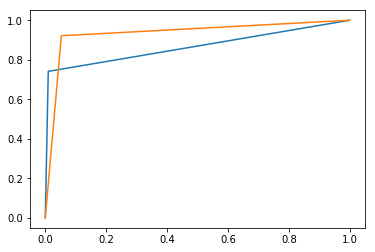

[0.86581542, 0.93446195]

In [21]:
calculate_auc([(0.00978216, 0.741413), (0.0526571, 0.921581)])

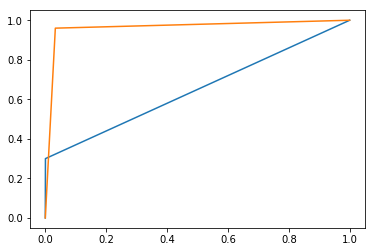

[0.6497485385, 0.96349785]

In [24]:
calculate_auc([(0.000502923, 0.3), (0.0330043, 0.96)])

In [86]:
####### distribution
pred_linSVC = pd.read_csv('../data/SVC_bayes_BEST_ROC.csv') 
pred_linSVC_one = pd.read_csv('../data/OneVsOne_SVM_BEST_ROC.csv') 
pred_lgb = pd.read_csv('../data/lightgbmtest.csv') 
toxic_SVC = pred_linSVC['toxic'].values
toxic_SVC_one = pred_linSVC_one['toxic'].values
toxic_lgb = pred_lgb['toxic'].values

In [87]:
import numpy as np
BIN = 10000
y,x = np.histogram(toxic_SVC, bins=BIN)
y_one, x_one=np.histogram(toxic_SVC_one, bins=BIN)
y_lgb, x_lgb = np.histogram(toxic_lgb, bins=BIN)

In [88]:
from scipy.special import logit
def edge_to_mean(x):
    result = []
    for i in range(len(x) - 1):
        result.append((x[i] + x[i+1]) / 2)
    return result
x = edge_to_mean(x)
x_one = edge_to_mean(x_one)
x_lgb = edge_to_mean(x_lgb)

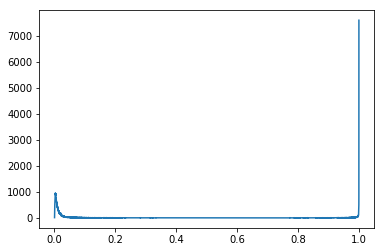

In [89]:
plt.figure()
plt.plot(x,y)


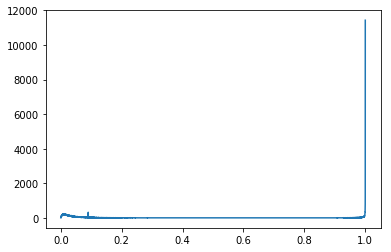

In [90]:
plt.plot(x_one,y_one)

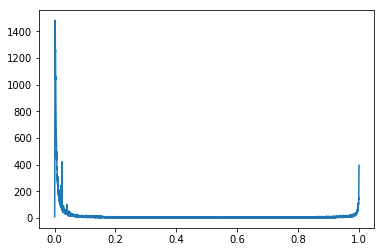

In [91]:
plt.plot(x_lgb,y_lgb)